**Python solutions to Gary Koop's "Analysis of Economic Data" (4th ed., 2013)**

**Chapter 8: Qualitative Choice Models**

Jakub Janus, [jakub.janus@uek.krakow.pl](jakub.janus@uek.krakow.pl)

# Exercise 8.1
The data set in COMMUTE.XLS contains data from N = 390 individuals on their
commuting choice between public transport and car. The data takes the form:
* Choice = 0 if the individual takes public transport and 1 if the individual takes
a car to work;
* Income = income (in thousands of dollars);
* Distance = distance to work (in miles).

(a) Estimate a logit model using Choice as the dummy dependent variable and
Income and Distance as explanatory variables. Interpret the signs of the
coefficients.


In [1]:
import pandas as pd
commute = pd.read_excel(r'datasets\COMMUTE.xls')
commute

,Choice,Income,Distance
0,0,16.440689,4.657276
1,0,39.909400,22.278497
2,2,46.098788,5.267421
3,2,41.488547,10.515348
4,2,72.762393,19.406761
...,...,...,...
385,2,106.389000,11.060643
386,2,96.825256,0.718475
387,2,105.964940,6.612690
388,1,41.380343,38.664881


Problem: 'Choice' variable contains values of 0, 1, and 2.

Let's assume that "2" is a different mode of transportation.

In [2]:
commute.loc[commute.Choice == 2, 'Choice'] = 0
commute

,Choice,Income,Distance
0,0,16.440689,4.657276
1,0,39.909400,22.278497
2,0,46.098788,5.267421
3,0,41.488547,10.515348
4,0,72.762393,19.406761
...,...,...,...
385,0,106.389000,11.060643
386,0,96.825256,0.718475
387,0,105.964940,6.612690
388,1,41.380343,38.664881


In [3]:
import statsmodels.api as sm
y = commute['Choice']
X = commute[['Income', 'Distance']]
logit_commute = sm.Logit(y, sm.add_constant(X))
logit_commute_fit = logit_commute.fit()
logit_commute_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.125097
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.744     
Dependent Variable: Choice           AIC:              103.5759  
Date:               2021-04-08 16:08 BIC:              115.4743  
No. Observations:   390              Log-Likelihood:   -48.788   
Df Model:           2                LL-Null:          -190.93   
Df Residuals:       387              LLR p-value:      1.8645e-62
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.2819    0.7159  -0.3938  0.6938  -1.6851   1.1213
Income        -0.2025    0.0309  -6.5616  0.0000  -0.2630  -0.1420
Distance       0.2907    0.0475   6.1255  0.0000   0.1977   0.3837
=================================================================

"""

(b) Display and interpret the actual choices made and the fitted choice probability
for all the individuals.

In [4]:
y_hat_logit = round(logit_commute_fit.predict(sm.add_constant(X)), 3)
logit_comp = pd.DataFrame({'y': y, 'y_hat': y_hat_logit})
logit_comp.T

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
y,0.000,0.000,0.0,0.000,0.0,1.0,0.0,0.0,1.000,0.0,...,0.0,0.0,0.000,0.0,1.00,0.0,0.0,0.0,1.000,0.000
y_hat,0.095,0.131,0.0,0.004,0.0,1.0,0.0,0.0,0.393,0.0,...,0.0,0.0,0.108,0.0,0.91,0.0,0.0,0.0,0.929,0.021


In [5]:
logit_comp.plot();

(c) Repeat parts (a) and (b) using a probit model.

In [6]:
probit_commute = sm.Probit(y, sm.add_constant(X))
probit_commute_fit = probit_commute.fit()
probit_commute_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.124617
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Probit
=================================================================
Model:              Probit           Pseudo R-squared: 0.745     
Dependent Variable: Choice           AIC:              103.2013  
Date:               2021-04-08 16:08 BIC:              115.0998  
No. Observations:   390              Log-Likelihood:   -48.601   
Df Model:           2                LL-Null:          -190.93   
Df Residuals:       387              LLR p-value:      1.5460e-62
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         -0.1528    0.4089  -0.3737  0.7086  -0.9543   0.6487
Income        -0.1125    0.0157  -7.1822  0.0000  -0.1432  -0.0818
Distance       0.1604    0.0239   6.7139  0.0000   0.1136   0.2073
=================================================================

"""

In [7]:
y_hat_probit = round(probit_commute_fit.predict(sm.add_constant(X)), 3)
probit_comp = pd.DataFrame({'y': y, 'y_hat': y_hat_probit})
probit_comp.T

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
y,0.000,0.000,0.0,0.000,0.0,1.0,0.0,0.0,1.000,0.0,...,0.0,0.0,0.000,0.0,1.000,0.0,0.0,0.0,1.000,0.000
y_hat,0.105,0.143,0.0,0.001,0.0,1.0,0.0,0.0,0.399,0.0,...,0.0,0.0,0.119,0.0,0.895,0.0,0.0,0.0,0.919,0.015


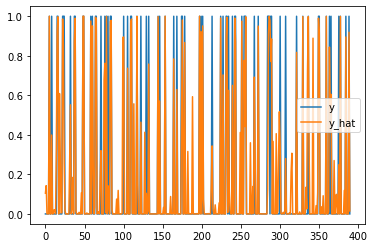

In [8]:
probit_comp.plot();

# Exercise 8.2
The data set in SMOKING.XLS is part of the data set taken by Mullahy (1997)
from the Child Health Supplement to the 1988 National Health Interview Survey.
In this exercise, we focus on the decision whether to smoke or not. The data set
is based on a survey of N = 1196 men. The dependent variable is the dummy
variable smoker which is 1 for smokers (and 0 for non-smokers).
The explanatory variables are:
* educ = number of years of schooling;
* age = age in years;
* income = family income in US dollars.

**Note: SMOKING.XLS is missing from the Koop's textbook dataset**. Instead, data by Mullahy (1997) are taken from the datasets to Wooldrige's "Introductory Econometrics: A ModernApproach, 6e", dataset: smoke. Description below.

SMOKE.DES

educ      cigpric   white     age       income    cigs      restaurn  lincome  agesq     lcigpric  

  Obs:   807

  1. educ                     years of schooling
  2. cigpric                  state cigarette price, cents per pack
  3. white                    =1 if white
  4. age                      in years
  5. income                   annual income, $
  6. cigs                     cigs. smoked per day
  7. restaurn                 =1 if state restaurant smoking restrictions
  8. lincome                  log(income)
  9. agesq                    age^2
 10. lcigpric                 log(cigprice)

In [9]:
colnames = ['educ', 'cigpric', 'white', 'age', 'income', 'cigs', 'restaurn', 'lincome', 'agesq', 'lcigpric']
smoking = pd.read_excel(r'datasets\SMOKE.xls', header = None, names = colnames)
smoking

,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric
0,16.0,60.506,1,46,20000,0,0,9.903487,2116,4.102743
1,16.0,57.883,1,40,30000,0,0,10.308950,1600,4.058424
2,12.0,57.664,1,58,30000,3,0,10.308950,3364,4.054633
3,13.5,57.883,1,30,20000,0,0,9.903487,900,4.058424
4,10.0,58.320,1,17,20000,0,0,9.903487,289,4.065945
...,...,...,...,...,...,...,...,...,...,...
802,18.0,61.818,0,52,30000,20,0,10.308950,2704,4.124195
803,18.0,61.676,1,31,12500,0,0,9.433484,961,4.121895
804,16.0,60.707,1,30,20000,0,0,9.903487,900,4.106059
805,10.0,59.988,1,18,20000,0,0,9.903487,324,4.094144


Since there is not dummy variable smoker/non-smoker, we create one, based on the cigs variable

In [10]:
smoking['smoker'] = [1 if x > 0 else 0 for x in smoking['cigs']]
smoking

,educ,cigpric,white,age,income,cigs,restaurn,lincome,agesq,lcigpric,smoker
0,16.0,60.506,1,46,20000,0,0,9.903487,2116,4.102743,0
1,16.0,57.883,1,40,30000,0,0,10.308950,1600,4.058424,0
2,12.0,57.664,1,58,30000,3,0,10.308950,3364,4.054633,1
3,13.5,57.883,1,30,20000,0,0,9.903487,900,4.058424,0
4,10.0,58.320,1,17,20000,0,0,9.903487,289,4.065945,0
...,...,...,...,...,...,...,...,...,...,...,...
802,18.0,61.818,0,52,30000,20,0,10.308950,2704,4.124195,1
803,18.0,61.676,1,31,12500,0,0,9.433484,961,4.121895,0
804,16.0,60.707,1,30,20000,0,0,9.903487,900,4.106059,0
805,10.0,59.988,1,18,20000,0,0,9.903487,324,4.094144,0



(a) Estimate a logit model using this data set and discuss the significance of each
explanatory variable.

In [11]:
y = smoking['smoker']
X = smoking[['educ', 'income', 'age']]
logit_smoking = sm.Logit(y, sm.add_constant(X))
logit_smoking_fit = logit_smoking.fit()
logit_smoking_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.649901
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.024     
Dependent Variable: smoker           AIC:              1056.9406 
Date:               2021-04-08 16:08 BIC:              1075.7139 
No. Observations:   807              Log-Likelihood:   -524.47   
Df Model:           3                LL-Null:          -537.51   
Df Residuals:       803              LLR p-value:      9.2187e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.3639     0.4013    3.3983   0.0007    0.5773    2.1505
educ      -0.1114     0.0267   -4.1757   0.0000   -0.1637   -0.0591
income     0.0000     0.0000    1.1197   0.2628   -0.0000    0.0000
age       -0.0157     0.0045   -3.5038   0.0005   -0.0245   -0.0069
=================================================================

"""

(b) What does the sign of each coefficient tell you about the effect of each explanatory
variable on choosing to smoke?

In [12]:
pd.DataFrame({'Significant': logit_smoking_fit.pvalues < 0.1, 'Negative impact on smoking': logit_smoking_fit.params < 0})

,Significant,Negative impact on smoking
const,True,False
educ,True,True
income,False,False
age,True,True


(c) Calculate the marginal effect of each explanatory variable on the probability
of choosing to smoke. Interpret these marginal effects.

In [13]:
margeff_logit_smoking = logit_smoking_fit.get_margeff()
margeff_logit_smoking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                 smoker
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0255      0.006     -4.352      0.000      -0.037      -0.014
income      2.186e-06   1.95e-06      1.123      0.261   -1.63e-06       6e-06
age           -0.0036      0.001     -3.606      0.000      -0.006      -0.002
==============================================================================
"""

(d) Repeat parts (a) to (c) for a probit model.

In [14]:
probit_smoking = sm.Probit(y, sm.add_constant(X))
probit_smoking_fit = probit_smoking.fit()
probit_smoking_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.649661
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Probit
=================================================================
Model:              Probit           Pseudo R-squared: 0.025     
Dependent Variable: smoker           AIC:              1056.5523 
Date:               2021-04-08 16:08 BIC:              1075.3256 
No. Observations:   807              Log-Likelihood:   -524.28   
Df Model:           3                LL-Null:          -537.51   
Df Residuals:       803              LLR p-value:      7.6446e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.8541     0.2473    3.4541   0.0006    0.3695    1.3388
educ      -0.0694     0.0163   -4.2485   0.0000   -0.1014   -0.0374
income     0.0000     0.0000    1.1131   0.2657   -0.0000    0.0000
age       -0.0098     0.0028   -3.5551   0.0004   -0.0153   -0.0044
=================================================================

"""

In [15]:
pd.DataFrame({'Significant': probit_smoking_fit.pvalues < 0.1, 'Negative impact on smoking': probit_smoking_fit.params < 0})

,Significant,Negative impact on smoking
const,True,False
educ,True,True
income,False,False
age,True,True


In [16]:
margeff_probit_smoking = probit_smoking_fit.get_margeff()
margeff_probit_smoking.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                 smoker
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0258      0.006     -4.400      0.000      -0.037      -0.014
income      2.162e-06   1.94e-06      1.116      0.265   -1.64e-06    5.96e-06
age           -0.0037      0.001     -3.644      0.000      -0.006      -0.002
==============================================================================
"""

(e) Compare your logit and probit results. Do they lead to similar conclusions
on which factors affect the decision to smoke?

In [17]:
pd.DataFrame({'Logit_param': logit_smoking_fit.params, 'Logit_pvalue': logit_smoking_fit.pvalues,
'Probit_param': probit_smoking_fit.params, 'Probit_pvalue': probit_smoking_fit.pvalues})

,Logit_param,Logit_pvalue,Probit_param,Probit_pvalue
const,1.363913,0.000678,0.854136,0.000552
educ,-0.111432,0.000030,-0.069388,0.000022
income,0.000010,0.262823,0.000006,0.265659
age,-0.015707,0.000459,-0.009837,0.000378


(there is no f)

(g) Which of the logit and probit models fits better, if you measure fit by the
number of correct predictions each makes?

In [18]:
import numpy as np
# Logit
logit_correct = (logit_smoking_fit.pred_table()[0, 0] + logit_smoking_fit.pred_table()[1, 1]) / np.sum(logit_smoking_fit.pred_table())
# Probit
probit_correct = (probit_smoking_fit.pred_table()[0, 0] + probit_smoking_fit.pred_table()[1, 1]) / np.sum(probit_smoking_fit.pred_table())
pd.DataFrame({'Correct': [logit_correct, probit_correct],
    'Pseudo R^2': [logit_smoking_fit.prsquared, probit_smoking_fit.prsquared]}, 
    index = (['Logit', 'Probit']))

,Correct,Pseudo R^2
Logit,0.596035,0.024251
Probit,0.596035,0.024613
